In [3]:
# math
import random as r

from random import choice, choices
from math import pi, sqrt, factorial

In [1]:
# data
import numpy as np
import scipy.stats
import pandas as pd

from scipy import stats as st
from matplotlib import pyplot as plt

In [12]:
series1 = [1, 2, 3, 4, 5, 6] # совокупность
variance = np.var(series1)  # 
standard_deviation1 = np.sqrt(variance)
variance_estimate = np.var(series1, ddof=1)  # выборка
standard_deviation = np.std(series1)  # стандартное отклонение 
standard_deviation_ddof = np.std(series1, ddof=1)

variance, variance_estimate, standard_deviation, standard_deviation_ddof

(2.9166666666666665, 3.5, 1.707825127659933, 1.8708286933869707)

In [2]:
weight_probs = {
        '2': 0.25,
        '3': 0.5,
        '5': 0.25
        }
# математическое ожидание
expectation = sum([int(kye) * weight_probs[kye] for kye in weight_probs])

square_of_expectation = expectation ** 2
expectation_of_squares = sum(
    [int(kye) * int(kye) * weight_probs[kye] for kye in weight_probs]
)

# дисперсия 
variance = expectation_of_squares - square_of_expectation

print('Математическое ожидание равно', expectation)
print('Дисперсия равна', variance)

Математическое ожидание равно 3.25
Дисперсия равна 1.1875


<BarContainer object of 7 artists>

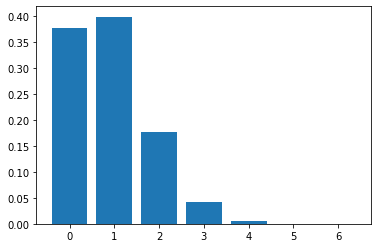

In [6]:
n_exams = 6
failure_rate = 15/100  # вероятность завалить один экзамен probability

distr = []

for k in range(0, n_exams + 1):
    # вероятность завалить 
    # 0 экзаменов, 1 экзамен и так далее до 6
    choose = factorial(n_exams) / (factorial(k) * factorial(n_exams - k))
    prob = choose * failure_rate ** k * (1 - failure_rate) ** (n_exams - k)
    distr.append(prob)
    
# построение гистограммы распределения вероятностей
plt.bar(range(0,n_exams+1), distr)

- ppf — от англ. percent point function — «функция процентных значений»;
- cdf — от англ. cumulative distribution function — «кумулятивная функция распределения»

In [ ]:
mu = 100500 # среднее значение распределения
sigma = 3500 # стандартное отклонение распределения

bonus_threshold = 111000 # где проходит граница для бонуса
penalty_threshold = 92000 # где проходит граница для штрафа

distr = st.norm(100500, 3500) 

p_penalty = distr.cdf(penalty_threshold)  #  вероятность получить штраф
p_bonus = 1 - distr.cdf(bonus_threshold)  # вероятность получить бонус


print('Вероятность бонуса:', p_bonus)
print('Вероятность штрафа:', p_penalty)

In [4]:
mu = 420 # среднее значение распределения
sigma = 65 # стандартное отклонение распределения

distr = st.norm(420, 65) 

prob = 0.9 # с какой вероятностью нужно распродать весь товар?

n_shipment = distr.ppf(1 - prob) # сколько единиц товара нужно заказать 

print('Нужно заказать единиц товара:', int(n_shipment))

Нужно заказать единиц товара: 336


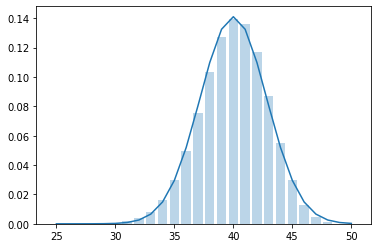

In [7]:

# Биномиальное распределение
p = 0.8
n = 50

binom = []
for k in range(0,n+1):
    choose = factorial(n)/(factorial(k) * factorial(n-k))
    prob = choose * p**k * (1-p)**(n-k) 
    binom.append(prob)

# Нормальное распределение
mu = n * p
var = n * p * (1-p)
sigma = var ** .5

x = range(25, n+1)
  
plt.bar(range(25, n + 1), binom[25:], alpha=0.3)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.show()

In [10]:
binom_n = 23000 # ваш код здесь - целевое количество человек в рассылке
binom_p = 0.4 # ваш код здесь - сколько пользователей открывают рассылку?

threshold = 9000# на какой охват сейчас рассчитывают?

mu = binom_n * binom_p # среднее значение распределения
sigma = sqrt(binom_n * binom_p * (1 - binom_p)) # стандартное отклонение распределения

p_threshold = 1 - st.norm(mu, sigma).cdf(threshold)
print(p_threshold)

0.9964477890716447


- Е.S.E. (от англ. estimated standard error) — «оценённая стандартная ошибка»
- equal_var (от англ. equal variance — «равная дисперсия») True/False

In [4]:
scooters = pd.Series([15, 31, 10, 21, 21, 32, 30, 25, 21,
28, 25, 32, 38, 18, 33, 24, 26, 40, 24, 37, 20, 36, 28, 38,
24, 35, 33, 21, 29, 26, 13, 25, 34, 38, 23, 37, 31, 28, 32,
24, 25, 13, 38, 34, 48, 19, 20, 22, 38, 28, 31, 18, 21, 24,
31, 21, 28, 29, 33, 40, 26, 33, 33,  6, 27, 24, 17, 28,  7,
33, 25, 25, 29, 19, 30, 29, 22, 15, 28, 36, 25, 36, 25, 29,
33, 19, 32, 32, 28, 26, 18, 48, 15, 27, 27, 27,  0, 28, 39,
27, 25, 39, 28, 22, 33, 30, 35, 19, 20, 18, 31, 44, 20, 18,
17, 28, 17, 44, 40, 33,])

optimal_value = 30 # доступно в среднем 30 самокатов

alpha = .05 # критический уровень статистической значимости

results = st.ttest_1samp(
    scooters, 
    optimal_value)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00033528259973700795
Отвергаем нулевую гипотезу


In [5]:
screens = pd.Series([4, 2, 4, 5, 5, 4, 2, 3, 3, 5, 2, 5, 2, 2, 2, 3, 3, 4, 8, 3, 4, 3, 5, 5, 4, 2, 5, 2, 3, 7, 5, 5, 6,  5, 3, 4, 3, 6, 3, 4, 4, 3, 5, 4, 4, 8, 4, 7, 4, 5, 5, 3, 4, 6, 7, 2, 3, 6, 5, 6, 4, 4, 3, 4, 6, 4, 4, 6, 2, 6, 5, 3, 3, 3, 4, 5, 3, 5, 5, 4, 3, 3, 3, 1, 5, 4, 3, 4, 6, 3, 1, 3, 2, 7, 3, 6, 6, 6, 5, 5])

prev_screens_value = 4.867

alpha = .05 # уровень статистической значимости

results = st.ttest_1samp(
    screens, 
    prev_screens_value)

# тест односторонний: p-value будет в два раза меньше
print('p-значение:', results.pvalue / 2)

# тест односторонний влево:
# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if (results.pvalue / 2 < alpha) and (screens.mean() < prev_screens_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 1.3358596895543794e-06
Отвергаем нулевую гипотезу


In [2]:
sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015, 
            2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785, 
            3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686, 
            1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007, 
            509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066, 
            3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255, 
            1740, 2596]

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


In [1]:
## Arithmetic Operations
x, y = 3, 2
print(x + y) # = 5
print(x - y) # = 1
print(x * y) # = 6
print(x / y) # = 1.5
print(x // y) # = 1
print(x % y) # = 1
print(-x) # = -3
print(abs(-x)) # = 3
print(int(3.9)) # = 3
print(float(x)) # = 3.0
print(x ** y) # = 9

5
1
6
1.5
1
1
-3
3
3
3.0
9


In [18]:
[i for i in range(1,11)]
series_6 = []
for i in range(1,6):
    series_6.append(1)

series_6

[1, 1, 1, 1, 1]

In [6]:
# Random

data_set = [
    ['кукла', 'жвачка', 'игрушечный питон'],
    ['мяч', 'чебурашка', 'лосяш']
]

def find_a_present(prizes):
    return choice(prizes)  # пишем choice(), а не random.choice()
print(find_a_present(data_set[0]))
print(find_a_present(data_set[1]))


print(r.randint(0, 100))  # случайное число от 0 до 100

# random number
print(f'random range = {r.randrange(1,10)}') 


p = 'abcdefghijklmnopqrstuvwxyz0123456789%^*(-_=+)'; 
print(''.join(choices(p, k=10)))

игрушечный питон
лосяш
28
random range = 5


In [2]:
# Multiples of 3 and 5
def multiples_of3_and5(size):
    n = 0
    for i in range(size):
        print(f'i = {i} and %5 = {i%5} and %3 = {i%3}')
        if not i % 5 or not i % 3:
            print(f'i = {i}')
            n = n + i
    print(f'result = {n}')
multiples_of3_and5(10)

i = 0 and %5 = 0 and %3 = 0
i = 0
i = 1 and %5 = 1 and %3 = 1
i = 2 and %5 = 2 and %3 = 2
i = 3 and %5 = 3 and %3 = 0
i = 3
i = 4 and %5 = 4 and %3 = 1
i = 5 and %5 = 0 and %3 = 2
i = 5
i = 6 and %5 = 1 and %3 = 0
i = 6
i = 7 and %5 = 2 and %3 = 1
i = 8 and %5 = 3 and %3 = 2
i = 9 and %5 = 4 and %3 = 0
i = 9
result = 23


In [1]:
# Even Fibonacci numbers

def fibonacci1(size):
    num1 = 0
    num2 = 1
    series = 0
    for i in range(size):
        print(series, end=' ');
        num1 = num2;
        num2 = series;
        series = num1 + num2;
        
def fibonacci2(size):
    # return 0 and 1 for first and second terms
    if size == 0:
        return 0
    elif size == 1:
        return 1
    else:
        # return the sum of two numbers
        #return fibonacci(size - 1) + fibonacci(size - 2)

#size = int(input('Enter how many numbers needed in Fibonacci series- '))
fibonacci1(10)


0 1 1 2 3 5 8 13 21 34

In [14]:
# factorial

def factorial_1(size):
    result = 1
    while size >= 1:
        print (result, end=' ')
        result *= size
        #print(result)
        size -= 1
        #print('size =', size)
factorial_1(7)


1 7 42 210 840 2520 5040

In [ ]:
r = float(input('Input the radius of the circle: '))
print (f'{str(r)} = {str(pi * r**2)}')

def max_of_array(x, y):
    #str_a = ''
    #for num in range(x, y):
    #    str_a += str(num)
    #str_list = list(str_a)
    #print(str_list)

    big_one = 0
    for num in range(x, y):
        if big_one < num:
            big_one = num
    return big_one

In [3]:
areas = [
    5.38, 21.72, 7.78, 26.86, 5.75,
    29.84, 22.67, 5.50, 16.85, 4.52
]

# В этой переменной будем суммировать площади.
# Пока что в ней ничего нет, поэтому она равна нулю.
sum_area = 0

for area in areas:
    # прибавляем к sum_area площадь ещё одной комнаты
    #sum_area = sum_area + area
	sum_area += area
print("Общая площадь =", sum_area)

Общая площадь = 146.87


In [4]:
years = [
    1981, 1982, 1983, 1984, 1986, 1987, 1990,
    1993, 1997, 2001, 2005, 2009, 2013, 2017
]

# В этой переменной будем подсчитывать количество.
# Пока что в ней ничего нет, поэтому она равна нулю.
count = 0

for year in years:
    if year > 2000:
        # Каждый раз загибаем по одному пальцу,
        # обнаружив альбом, выпущенный в 21 веке
        count += 1   # это то же самое, что `count = count + 1`

print("Выпущено альбомов в XXI веке:", count)

Выпущено альбомов в XXI веке: 5


In [2]:
def is_prime_v1(n):
    """Return True if n is a prime number.
    False otherwise.
    """

    if n == 1:
        return False  # 1 is not prime
    
    for num in range(2, n):
        if n % num == 0:
            return False
    return True


# === Testing ===
for n in range(1, 21):
    print(n, is_prime_v1(n))

1 False
2 True
3 True
4 False
5 True
6 False
7 True
8 False
9 False
10 False
11 True
12 False
13 True
14 False
15 False
16 False
17 True
18 False
19 True
20 False


In [1]:
"""Check if strings are anagram"""

str1 = 'Zhe eyes'
str2 = 'They see'

# remove white-spaces and
# upcase all the characters
str1 = str1.replace(' ','').upper()
str2 = str2.replace(' ','').upper()

# compare the sorted strings
if sorted(str1) == sorted(str2):
    print("It's an anagram")
else:
    print("It's not an anagram")

It's not an anagram


In [1]:
def subtraction(minuend, subtrahend): 
    result = minuend - subtrahend
    print(result)

subtraction(2, 1) 

1
